In [1]:
path = "/Bridging_the_digital_divide"

In [2]:
import pandas as pd
import numpy as np
import os

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
data = pd.read_csv('data/results_CLIP_no_sub.csv')
data.head()

,Unnamed: 0,Unnamed: 0.1,id,country.name,country.id,region.id,type,imageRelPath,topics,place,income,CLIP score
0,0,24655,5fd0457ff2d9500e435933ca,Serbia,rs,eu,video,assets/5fd0457ff2d9500e435933ca/6df313d79f9c0f...,"Adding spices to food while cooking,Spices",rajkovic,1193.0,0.239534
1,1,16463,5fd04872f2d9500e4359465c,South Africa,za,af,video,assets/5fd04872f2d9500e4359465c/37c209cb7f9adf...,"Adding spices to food while cooking,Spices",van-rheede,448.0,0.260990
2,2,29818,5fd03a0bf2d9500e4358e9a7,Iran,ir,as,video,assets/5fd03a0bf2d9500e4358e9a7/de9e6e8a759f7e...,"Adding spices to food while cooking,Spices",ahmadinejad,2369.0,0.309823
3,3,13143,5fd025ad04167a0cab36b3a8,Brazil,br,am,video,assets/5fd025ad04167a0cab36b3a8/647b2947695589...,"Adding spices to food while cooking,Spices",cancela-reis,284.0,0.226416
4,4,28760,5fd02d9ca8444d0db97b4b22,Colombia,co,am,video,assets/5fd02d9ca8444d0db97b4b22/18f3b1e7cb55e1...,"Adding spices to food while cooking,Spices",cruz,1963.0,0.284779


## Intervals by geometric progression [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]

In [4]:
data.loc[data['income'].between(0, 100, 'both'), 'bin'] = 'a_0-100'
data.loc[data['income'].between(100, 200, 'right'), 'bin'] =  'b_100-200'
data.loc[data['income'].between(200, 400, 'right'), 'bin'] = 'c_200-400'
data.loc[data['income'].between(400, 800, 'right'), 'bin'] =  'd_400-800'
data.loc[data['income'].between(800, 1600, 'right'), 'bin'] = 'e_800-1600'
data.loc[data['income'].between(1600, 3200, 'right'), 'bin'] = 'f_1600-3200'
data.loc[data['income'].between(3200, 6400, 'right'), 'bin'] = 'g_3200-6400'
data.loc[data['income'].between(6400, 12800, 'right'), 'bin'] = 'h_6400-12800'
data.loc[data['income'].between(12800, 25600, 'right'), 'bin'] = 'i_12800-25600'

In [5]:
bin_unique = data['bin'].unique()
bin_range = [str(int(data[data['bin'] == i]['income'].min())) + '-' + str(int(data[data['bin'] == i]['income'].max())) 
                for i in bin_unique]
bin_count = [data[data['bin'] == i]['income'].count() for i in bin_unique]


bin_df = pd.DataFrame()
bin_df['bin'] = bin_unique
bin_df['bin_value_range'] = bin_range
bin_df['bin_count'] = bin_count

### No of images per bin

<AxesSubplot:xlabel='bin'>

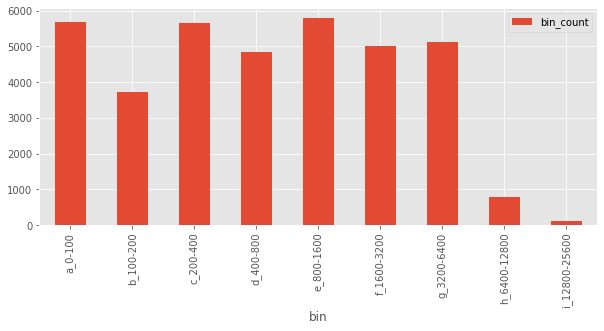

In [6]:
bin_df.sort_values('bin').plot.bar(x='bin', y='bin_count', figsize=(10,4))   # replace labels in plot

### Average CLIP Scores Per Bin

In [7]:
# Calculating average CLIP scores for each bin
avg_list = [0] * len(data)
data['avg_clip_score'] = avg_list 

for i in data['bin'].unique():
  data.loc[data['bin'] == i, 'avg_clip_score'] = data[data['bin']==i]['CLIP score'].mean()

In [8]:
sns.set_theme(style='whitegrid', context='paper', font_scale=2)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, '(0, 100]'),
  Text(1, 0, '(100, 200]'),
  Text(2, 0, '(200, 400]'),
  Text(3, 0, '(400, 800]'),
  Text(4, 0, '(800, 1600]'),
  Text(5, 0, '(1600, 3200]'),
  Text(6, 0, '(3200, 6400]'),
  Text(7, 0, '(6400, 12800]'),
  Text(8, 0, '(12800, 25600]')])

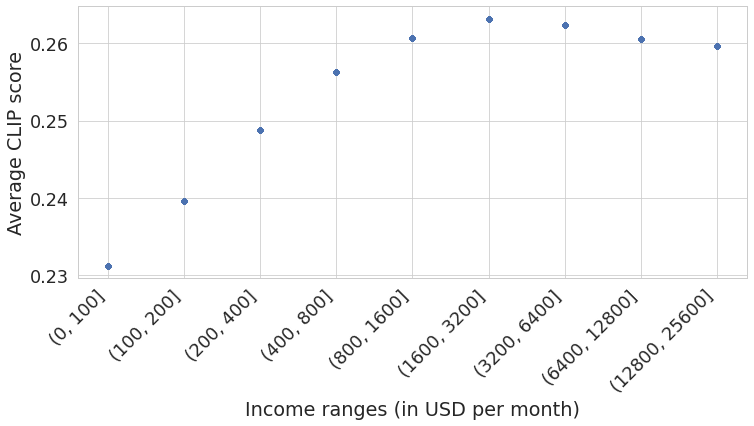

In [20]:
a = data.sort_values('bin').plot.scatter(x='bin', y='avg_clip_score', figsize=(12,5))   #put more information, add connecting line, (mean, min, max, median)
a.set_xticklabels(('(0, 100]', '(100, 200]','(200, 400]', '(400, 800]', '(800, 1600]', '(1600, 3200]', '(3200, 6400]', '(6400, 12800]', '(12800, 25600]'))
a.set_xlabel("Income ranges (in USD per month)")
a.set_ylabel("Average CLIP score")

plt.xticks(rotation=45, ha='right')

<Figure size 432x288 with 0 Axes>

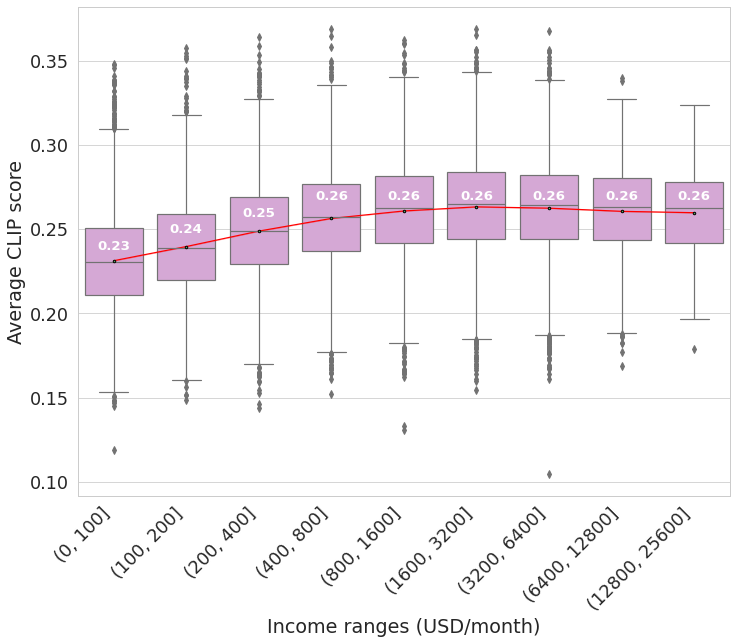

In [45]:
from matplotlib import pyplot
a4_dims = (11.7, 9)
plt.tight_layout()
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.boxplot(data=data.sort_values('bin'), x='bin', y='CLIP score', ax=ax, color='plum', showmeans=True,
            meanprops={"marker": ".",
                       "markeredgecolor": "black",
                       "markersize": "5",
                      "linewidth": 2}
            )
sns.lineplot(data= data.sort_values('bin'), x='bin', y='avg_clip_score',ax=ax, color = 'red')
ax.set_xticklabels(('(0, 100]', '(100, 200]','(200, 400]', '(400, 800]', '(800, 1600]', '(1600, 3200]', '(3200, 6400]', '(6400, 12800]', '(12800, 25600]'))
ax.set_xlabel("Income ranges (USD/month)")
ax.set_ylabel("Average CLIP score")


medians = round(data.groupby(['bin'])['CLIP score'].median(), 2)
vertical_offset = data['CLIP score'].median() * 0.03 # offset from median for display

for xtick in ax.get_xticks():
    ax.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')


plt.xticks(rotation=45, ha='right')
# plt.savefig('boxplot_clip.png', dpi=199)
plt.savefig('Images/boxplot_clip.pdf', bbox_inches='tight') #Save figs as .pdf for better quality in papers